In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats as stats
import pylab as py

In [273]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [274]:
test=pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [275]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [276]:
print(df['Age'].unique())
print(test['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']


In [277]:
df['Age']=df['Age'].map({'0-17':1, '55+':2, '26-35':3, '46:50':4, '51-55':5, '36-45':6, '18-25':7})

In [278]:
df['Gender']=df['Gender'].map({'M':1, 'F':0})

In [279]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [280]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,2.0,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5.0,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,3.0,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,3.0,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,2.0,1,C,2,0,20,NaN,NaN,365


In [281]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                            45701
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [282]:
null=['Age', 'Product_Category_2', 'Product_Category_3']

In [283]:
def null_value(df, group):
    #size=len(group)
    for j,i in enumerate(group):
        mode=df[i].mode()[0]
        print(f'Mode of {i} is {mode}')
        print("")
        df[i]=df[i].fillna(df[i].mode()[0])

In [284]:
null_value(df, null)

Mode of Age is 3.0

Mode of Product_Category_2 is 8.0

Mode of Product_Category_3 is 16.0



In [285]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<AxesSubplot:>

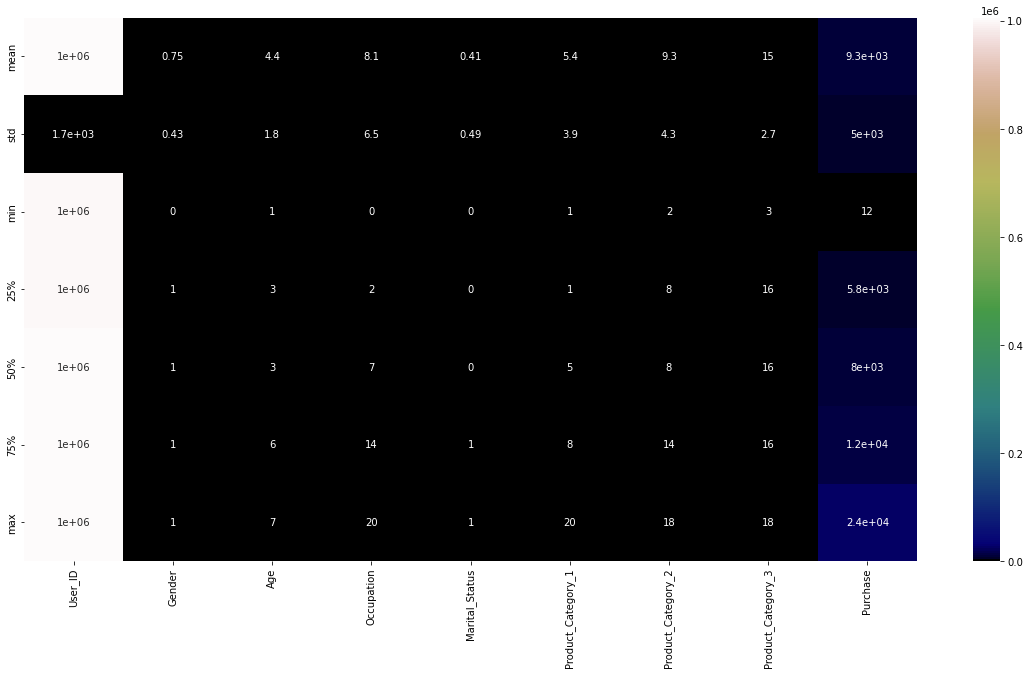

In [286]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth')

((array([-4.70648688, -4.52228984, -4.42257089, ...,  4.42257089,
          4.52228984,  4.70648688]),
  array([   12,    12,    12, ..., 23961, 23961, 23961], dtype=int64)),
 (4905.159387964044, 9263.968712959126, 0.9765191160164065))

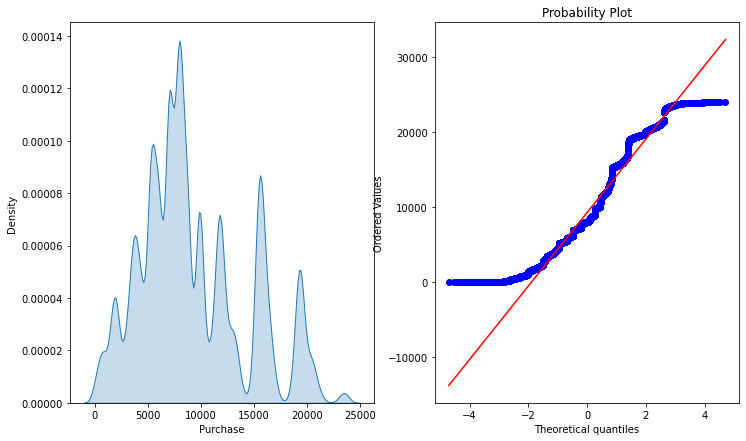

In [287]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.kdeplot(df['Purchase'], shade=True)
plt.subplot(1,2,2)        
stats.probplot(df['Purchase'], plot=py)

In [288]:
def conti(df, group):
    size=len(group)
    plt.figure(figsize=(5*size,5))
    for j, i in enumerate(group):
        
        mini= df[i].min()
        maxx= df[i].max()
        rag = df[i].max()-df[i].min()
        mean= df[i].mean()
        median= df[i].median()
        std = df[i].std()
        skew= df[i].skew()
        kurt = df[i].kurtosis()
            
        print('Details')
        print('Min: {}'.format(mini))
        print("")
        print('Max: {}'.format(maxx))
        print("")
        print('Range: {}'.format(rag))
        print("")
        print('Mean: {}'.format(mean))
        print("")
        print('Median: {}'.format(median))
        print("")
        print('Std: {}'.format(std))
        print("")
        print('Skew: {}'.format(skew))
        print("")
        print('kurt: {}'.format(kurt))



        
        
        
        

In [289]:
conti(df, [['Purchase', 'Occupation']])

Details
Min: Purchase      12
Occupation     0
dtype: int64

Max: Purchase      23961
Occupation       20
dtype: int64

Range: Purchase      23949
Occupation       20
dtype: int64

Mean: Purchase      9263.968713
Occupation       8.076707
dtype: float64

Median: Purchase      8047.0
Occupation       7.0
dtype: float64

Std: Purchase      5023.065394
Occupation       6.522660
dtype: float64

Skew: Purchase      0.60014
Occupation    0.40014
dtype: float64

kurt: Purchase     -0.338378
Occupation   -1.216114
dtype: float64


<Figure size 360x360 with 0 Axes>

# Visulization Part

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
def visual(df, group):
    size=len(group)
    
    for j, i in enumerate(group):
        plt.figure(figsize=(7*size,5))
        plt.subplot(1, size, 1)
        sns.boxplot(x=df[i], y=df['Purchase'])
        plt.subplot(1, size, 2 )
        sns.barplot(x=df[i], y=df['Purchase'])
        plt.show()

In [292]:
count=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

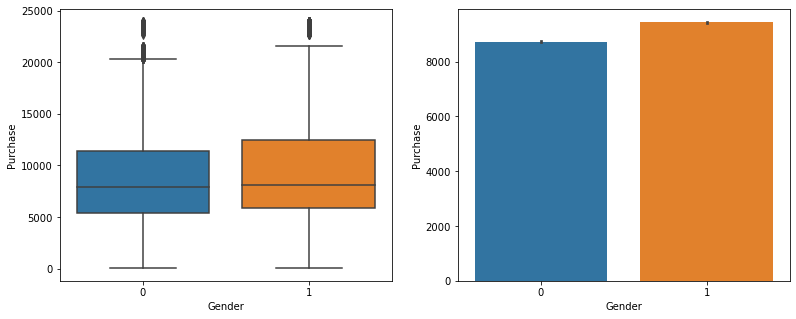

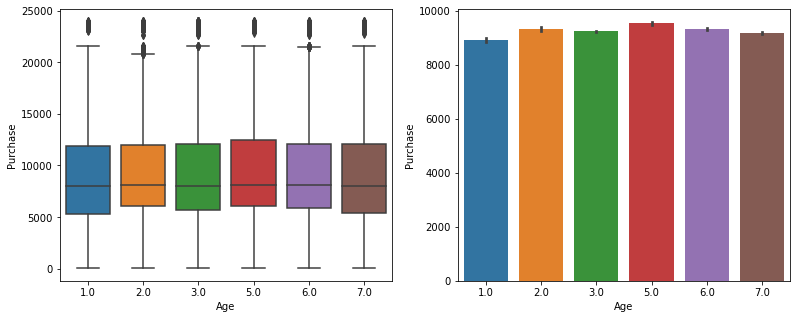

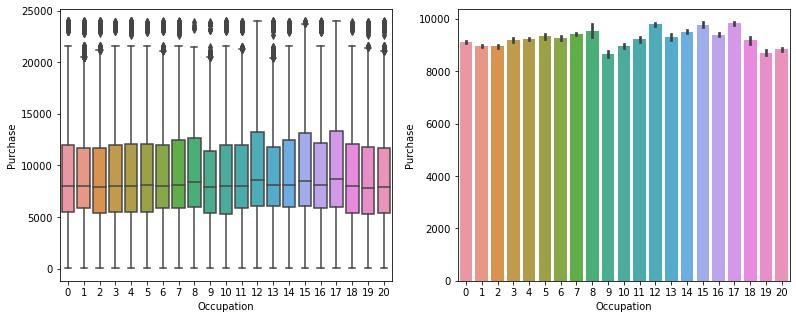

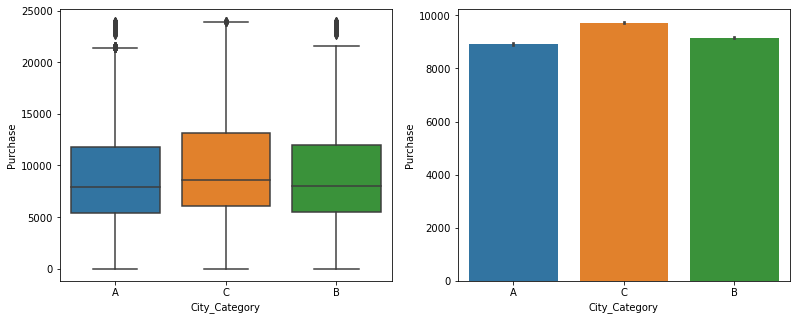

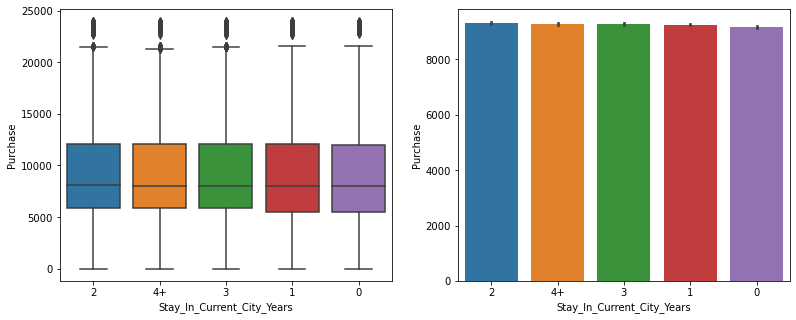

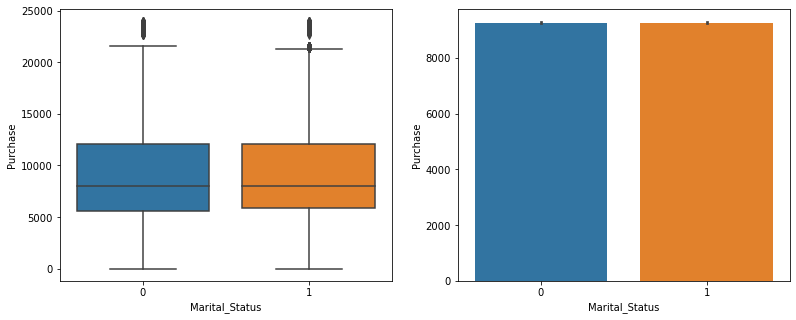

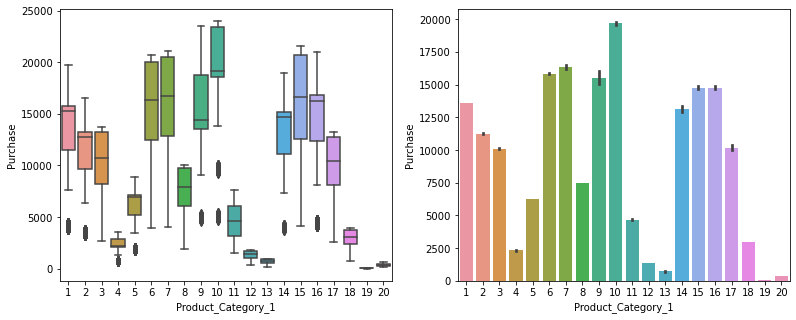

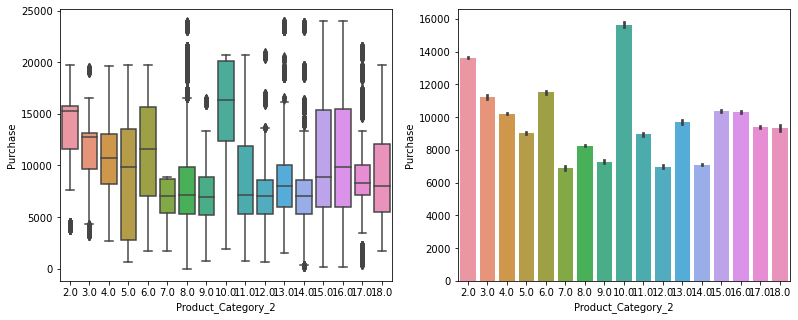

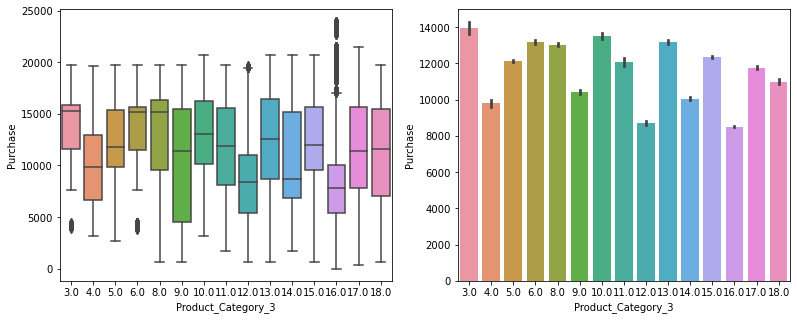

In [293]:
visual(df, count )


# Bivariate Analysis

In [294]:
def bivariate(df, group):
    size=len(group)
    for j, i in enumerate(group):
        plt.figure(figsize=(7*size,5))
        plt.subplot(1, size, 1 )
        sns.countplot(df[df["Gender"]==1][i])
        plt.xlabel(f'Male /{i}')
        
        plt.subplot(1, size, 2 )
        sns.countplot(df[df["Gender"]==0][i])
        plt.xlabel(f'Female /{i}')
        plt.show()

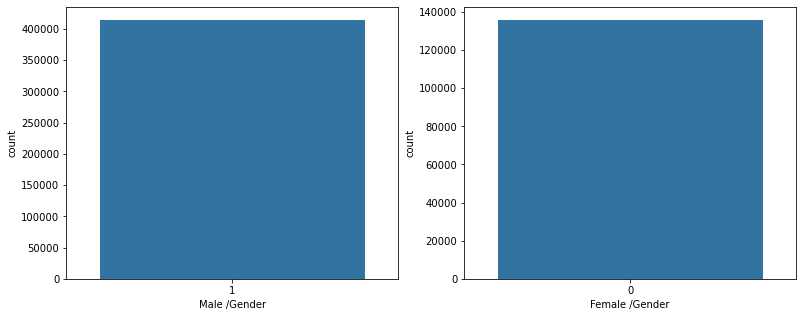

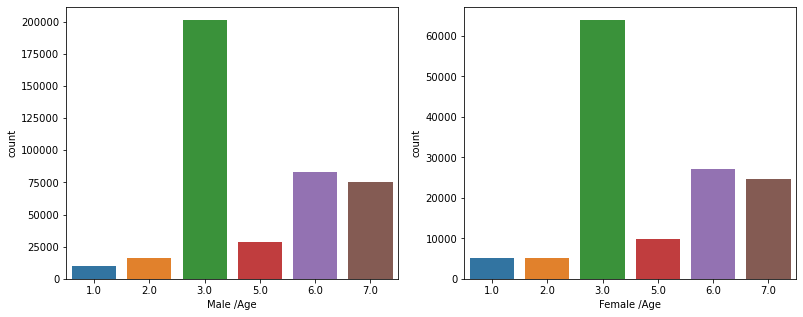

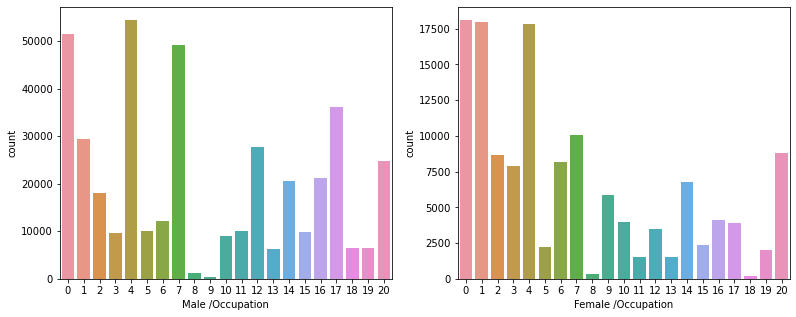

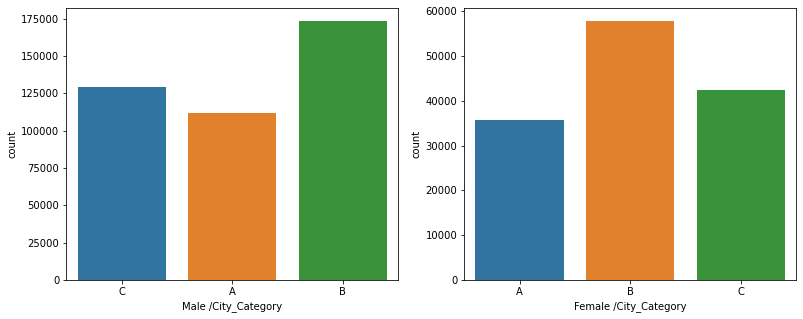

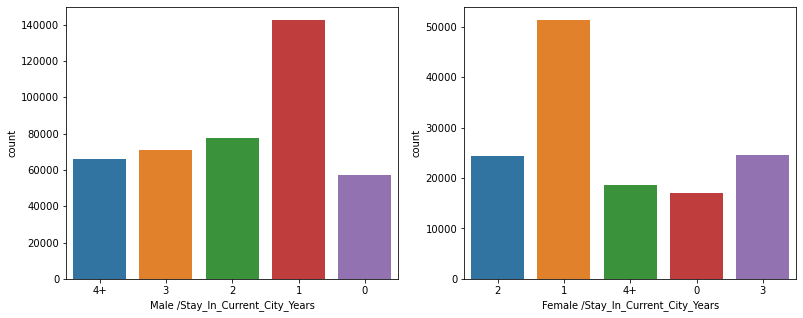

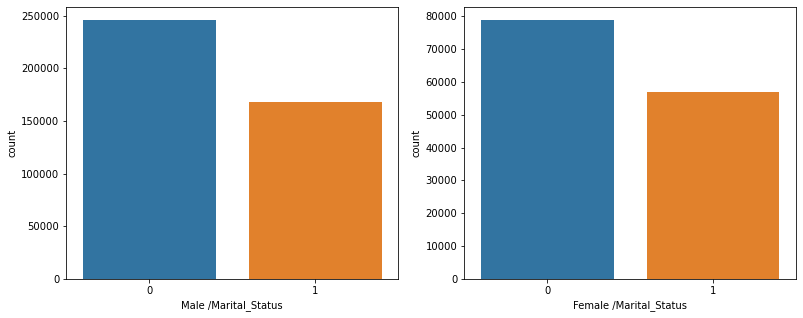

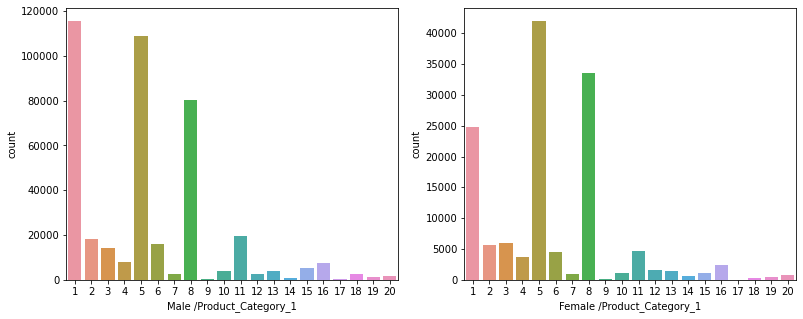

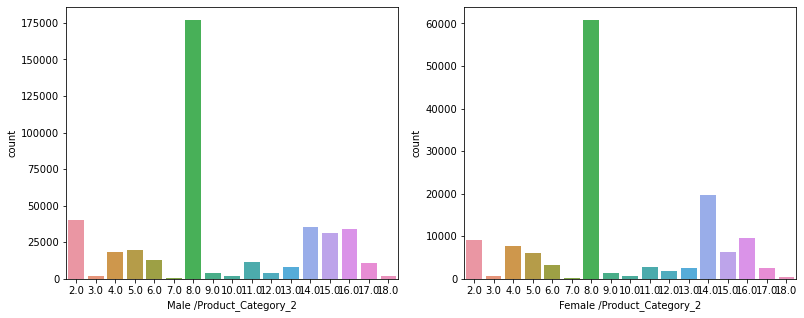

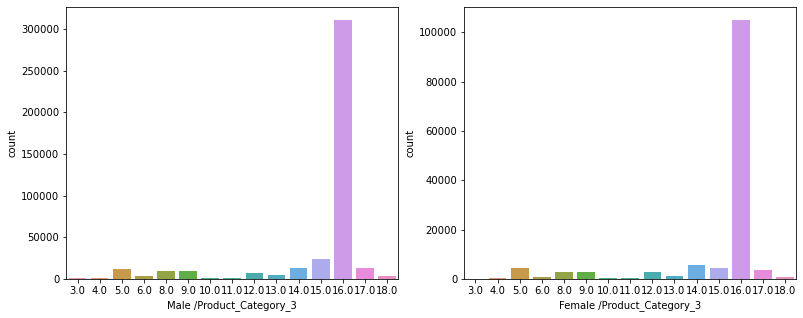

In [295]:
bivariate(df, count)

In [296]:
def multi(df, group):
    size=len(group)
    for j, i in enumerate(group):
        plt.figure(figsize=(10*size, 5))
        plt.subplot(1, size, 1)
        sns.barplot(x=df[i], y=df['Purchase'], hue=df['Gender'])
        plt.show()

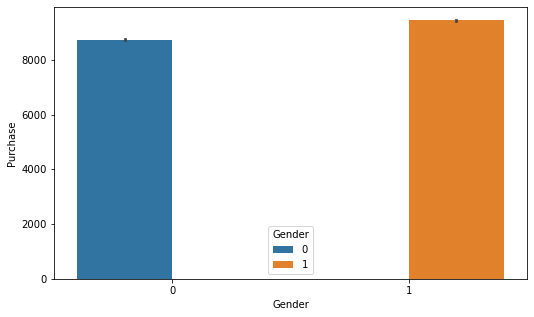

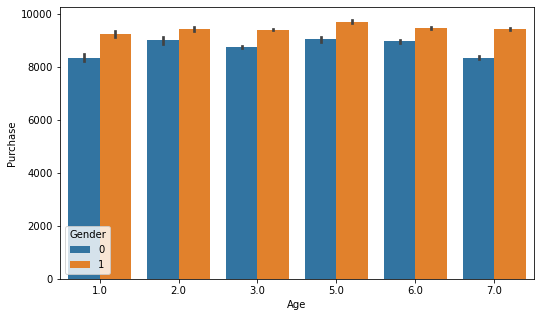

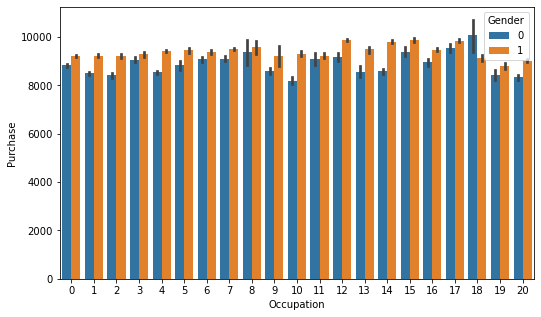

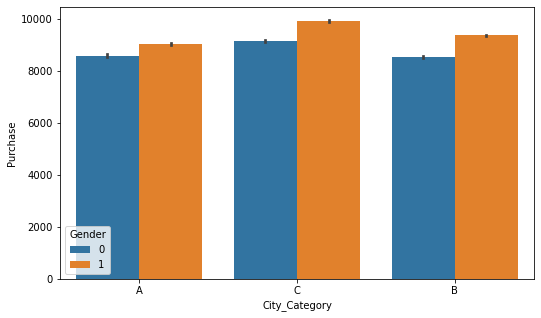

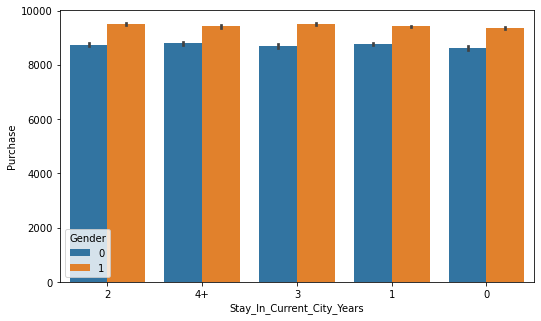

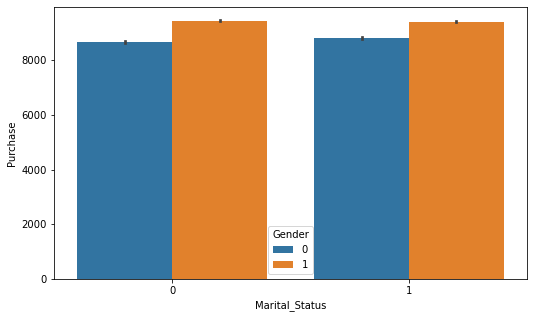

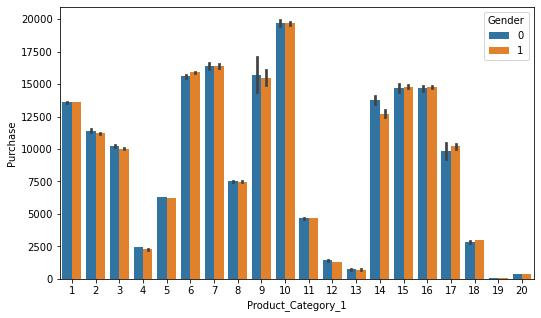

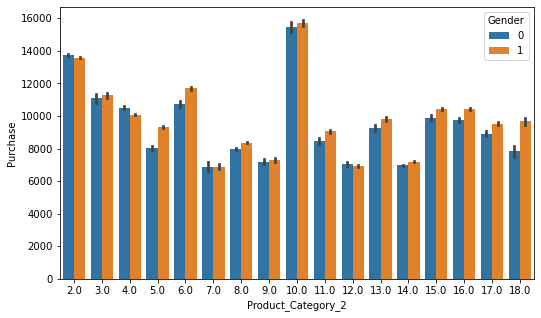

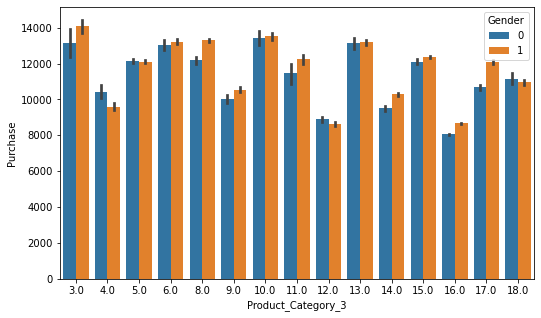

In [297]:
multi(df, count)

<AxesSubplot:xlabel='Purchase'>

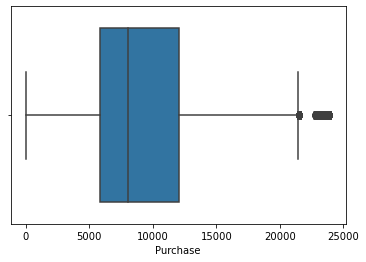

In [298]:
sns.boxplot(df['Purchase'])

In [299]:
q1=np.percentile(df['Purchase'],25,interpolation='midpoint')
q3=np.percentile(df['Purchase'],75,interpolation='midpoint')
iqr= q3-q1
maximum=q3+1.5*iqr
df=df[df['Purchase']<=maximum]

<AxesSubplot:xlabel='Purchase'>

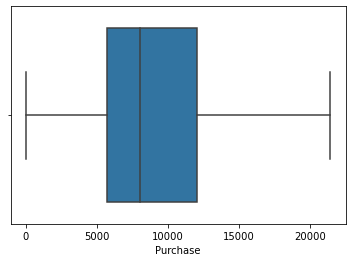

In [300]:
sns.boxplot(df['Purchase'])

## Training Data

In [301]:
y=df['Purchase']
X=df.drop(columns=['Purchase', 'User_ID', 'Product_ID'])

In [302]:
X['City_Category']=X['City_Category'].map({'A':1, 'B':2, 'C':3})

In [303]:
X=pd.get_dummies(X,columns=['Stay_In_Current_City_Years'])

In [304]:
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,1.0,10,1,0,3,8.0,16.0,0,0,1,0,0
1,0,1.0,10,1,0,1,6.0,14.0,0,0,1,0,0
2,0,1.0,10,1,0,12,8.0,16.0,0,0,1,0,0
3,0,1.0,10,1,0,12,14.0,16.0,0,0,1,0,0
4,1,2.0,16,3,0,8,8.0,16.0,0,0,0,0,1


In [305]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 547391, dtype: int64

In [306]:
from sklearn.preprocessing import StandardScaler
cols=X.columns
st=StandardScaler()

In [307]:
data=st.fit_transform(X)
data=pd.DataFrame(data, columns=cols)
X=data

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=55)

In [309]:
X_train.shape, X_test.shape

((437912, 13), (109479, 13))

In [310]:
y_train.shape, y_test.shape

((437912,), (109479,))

In [311]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

In [313]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_pred

array([ 9454.17183011,  7634.23433011,  7920.67183011, ...,
        8042.92183011, 10701.92183011,  9648.67183011])

In [316]:
#train_score=mean_absolute_error(LR_pred,y_train)
test_score=mean_absolute_error(LR_pred, y_test)
    
rmsle=mean_squared_log_error(LR_pred, y_test)
print(test_score)
print(rmsle)

3487.3045687276026
0.4703033215161247


y = np.array(['Purchase'])

newarr = y.reshape(-1, 1)
newarr=y

In [350]:
models={ 'RandomForest': RandomForestRegressor(),
         'DecisionTree': DecisionTreeRegressor(),
         'LinerModel'  : LinearRegression()
       }

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    
    train=model.predict(X_train)
    test=model.predict(X_test)
    
    train_score=mean_absolute_error(train,y_train)
    test_score=mean_absolute_error(test, y_test)
    
    rmsle=mean_squared_log_error(test, y_test)
    
    print(list(models.keys())[i])
    print(f"Training Score: {train_score}")
    print(f'Test Score: {test_score}')
    print(f'RMSLE: {rmsle}')
    print("")
    
    
    
    

RandomForest
Training Score: 1719.019788151868
Test Score: 2197.2792202122214
RMSLE: 0.1436831355483621

DecisionTree
Training Score: 1591.5962783795192
Test Score: 2306.2569320155217
RMSLE: 0.1647207353104019

LinerModel
Training Score: 3492.5880404610575
Test Score: 3487.3045687276026
RMSLE: 0.4703033215161247



In [351]:
new_df=X

In [353]:
from sklearn.decomposition import PCA
rat=PCA(n_components=len(new_df.columns)-1)
rat.fit_transform(X)
exp=rat.explained_variance_ratio_
exp

array([0.13196175, 0.11009406, 0.09409559, 0.09253476, 0.09196358,
       0.08626132, 0.0831451 , 0.07636532, 0.06837978, 0.06645527,
       0.05772756, 0.0410159 ])

Text(0.5, 1.0, 'Elbow Plot')

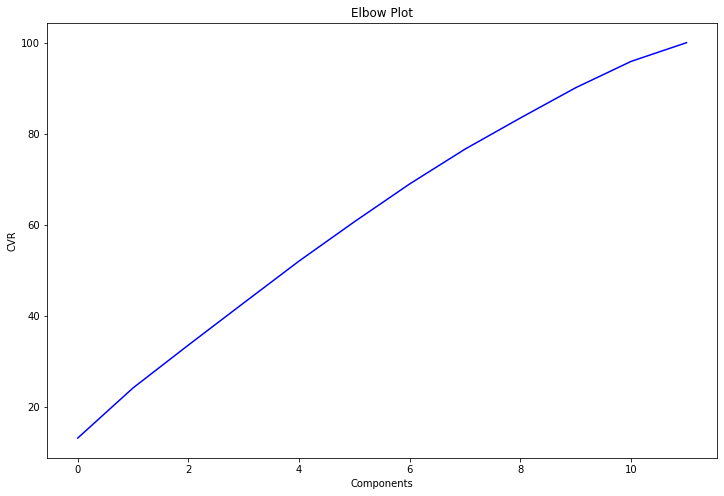

In [354]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(exp)*100, color="b")
plt.xlabel("Components")
plt.ylabel("CVR")#Cumulative Variance Ratio
plt.title('Elbow Plot')

In [355]:
rat = PCA(n_components=12) #consider 12 as requried components
data_transform = rat.fit_transform(X)
rat.explained_variance_

array([1.71550595, 1.43122538, 1.22324494, 1.20295412, 1.19552869,
       1.12139925, 1.08088831, 0.992751  , 0.8889387 , 0.86392006,
       0.75045969, 0.53320766])

In [356]:
X=data_transform

In [358]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=55)

In [359]:
models={ 'RandomForest': RandomForestRegressor(),
         'DecisionTree': DecisionTreeRegressor(),
         'LinerModel'  : LinearRegression()
       }

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    
    train=model.predict(X_train)
    test=model.predict(X_test)
    
    train_score=mean_absolute_error(train,y_train)
    test_score=mean_absolute_error(test, y_test)
    
    rmsle=mean_squared_log_error(test, y_test)
    
    print(list(models.keys())[i])
    print(f"Training Score: {train_score}")
    print(f'Test Score: {test_score}')
    print(f'RMSLE: {rmsle}')
    print("")

RandomForest
Training Score: 1721.988923455849
Test Score: 2205.06591159691
RMSLE: 0.1482166459146199

DecisionTree
Training Score: 1591.5962783795192
Test Score: 2315.8619133494904
RMSLE: 0.16904794352622501

LinerModel
Training Score: 3492.9867762599843
Test Score: 3487.634199513605
RMSLE: 0.47024517299233937

